<a href="https://colab.research.google.com/github/MadhavanTR/Object_Detection/blob/master/Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries

# New Section

In [1]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install kaggle

# Clone Repo

In [2]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.81 MiB | 11.21 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [0]:
import os 
os.chdir('Mask_RCNN/samples')

# Prepare Model

In [4]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
print(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/content/Mask_RCNN


Using TensorFlow backend.


... done downloading pretrained model!


# Create Inference Object

In [0]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [6]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [0]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Prediction and Saving the results as output images

In [0]:
# NOTE THE IMAGE CAR_PERSON SHOULD BE INSIDE SUCH DIRECTORY OR EDIT TO CHOOSE YOUR OWN
path = '../images/car_person.jpg'
image = skimage.io.imread(path)

# Run detection
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]

In [0]:
#@title Default title text
# mask = r['masks']
# names = r['class_ids']
# mask = 255*mask.astype(np.uint8)
# for i in range(mask.shape[2]):

#     string =  '../mask_images/mask_' + class_names[names[i]]+'_'+str(i)+'_.jpg' 
#     print(string)
#     img = Image.fromarray(mask[:,:,i])
#     img.save(string)
#     print(type(img))
    #origImg = skimage.io.imread(path)
    # plt.figure()
    # plt.imshow(origImg)
    # plt.figure()
    # plt.imshow(img)
    # print(type(img), type(origImg))
    # for j in range(temp.shape[2]):
    #   temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    #   string = '../output_images/temp_' + class_names[names[i]]+'_'+str(j)+'.jpg' 
    #   img = Image.fromarray(mask[:,:,i])
    #   img.save(string)

../mask_images/mask_person_0_.jpg
<class 'PIL.Image.Image'>
../mask_images/mask_car_1_.jpg
<class 'PIL.Image.Image'>
../mask_images/mask_tie_2_.jpg
<class 'PIL.Image.Image'>
../mask_images/mask_car_3_.jpg
<class 'PIL.Image.Image'>
../mask_images/mask_car_4_.jpg
<class 'PIL.Image.Image'>
../mask_images/mask_car_5_.jpg
<class 'PIL.Image.Image'>
../mask_images/mask_book_6_.jpg
<class 'PIL.Image.Image'>
../mask_images/mask_car_7_.jpg
<class 'PIL.Image.Image'>


[[0]]
[[1 2]]
(524, 473)
2


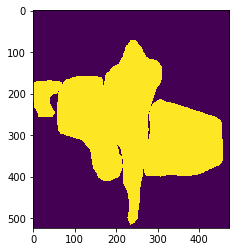

In [0]:
# for j in np.unique(r['class_ids']):
#   print(np.asarray(np.where(r['class_ids']==j)))
# res = np.zeros(r['masks'].shape[0:2])
# print(res.shape)
# for i in range(r['masks'].shape[2]):
#   #print(i)
#   res = res+r['masks'][:, :, i]
# # plt.figure()
# # plt.imshow(res)
# res[np.where(res[:]>0)]=1
# plt.figure()
# plt.imshow(res)
# print(np.unique(r['class_ids']).shape[0])

class  1 at  [0]
../mask_images/mask_person_.jpg
<class 'PIL.Image.Image'>
class  3 at  [1 3 4 5 7]
../mask_images/mask_car_.jpg
<class 'PIL.Image.Image'>
class  28 at  [2]
../mask_images/mask_tie_.jpg
<class 'PIL.Image.Image'>
class  74 at  [6]
../mask_images/mask_book_.jpg
<class 'PIL.Image.Image'>


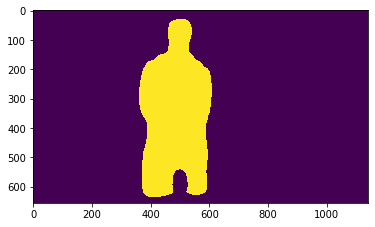

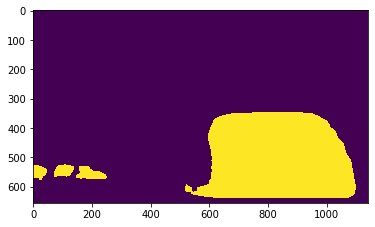

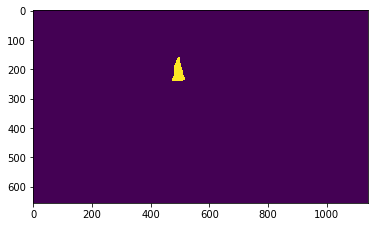

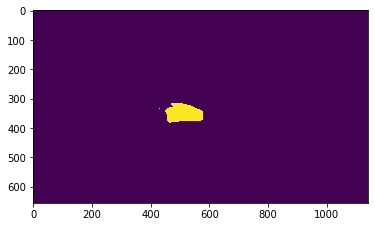

In [9]:
import imageio
mask = r['masks']
names = r['class_ids']
mask = 255*mask.astype(np.uint8)
res = np.zeros(r['masks'].shape[0:2])
for j in np.unique(r['class_ids']):
  indices = np.asarray(np.where(r['class_ids']==j))
  print("class ", j, "at ", indices[0])
  for i in indices[0]:
    res = res+r['masks'][:, :, i]
  res[np.where(res[:]>0)]=1
  plt.figure()
  plt.imshow(res)
  #NOTE THE FOLDER mask_images SHOULD BE THERE
  string =  '../mask_images/mask_' + class_names[j]+'_.jpg'
  print(string)
  img = Image.fromarray(res)
  print(type(img))
  #img.save(string)
  imageio.imwrite(string, res)
  res = np.zeros(r['masks'].shape[0:2])


# for i in range(np.unique(r['class_ids']).shape[0]):
  
#   res = res+r['masks'][:, :, i]
# plt.figure()
# plt.imshow(res)
# res[np.where(res[:]>0)]=1
# plt.figure()
# plt.imshow(res)
# print(r['masks'][:, :, i].shape)
#print(np.unique(r['class_ids']).shape[0])

In [0]:
!zip -r /content/Mask_RCNN/output.zip /content/Mask_RCNN/output_images

  adding: content/Mask_RCNN/output_images/ (stored 0%)
  adding: content/Mask_RCNN/output_images/mask_book_6_.jpg (deflated 82%)
  adding: content/Mask_RCNN/output_images/mask_car_7_.jpg (deflated 86%)
  adding: content/Mask_RCNN/output_images/mask_car_3_.jpg (deflated 90%)
  adding: content/Mask_RCNN/output_images/mask_tie_2_.jpg (deflated 87%)
  adding: content/Mask_RCNN/output_images/mask_car_5_.jpg (deflated 91%)
  adding: content/Mask_RCNN/output_images/mask_car_1_.jpg (deflated 63%)
  adding: content/Mask_RCNN/output_images/mask_car_4_.jpg (deflated 87%)
  adding: content/Mask_RCNN/output_images/mask_person_0_.jpg (deflated 53%)
